<a href="https://colab.research.google.com/github/AhamedShimak/My-AI-Projects/blob/main/happy_or_sad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT AND MY DEFINED FUNCTIONS

### Imports

In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets

from tqdm.auto import tqdm
import sklearn
from sklearn.model_selection import train_test_split



###My functions

In [2]:
## Visualization #####################
########################################################################################
########################################################################################

def details(tensor):
  print("")
  print("Shape: ",tensor.shape)
  print("Dimentions: ",tensor.ndim)
  print("###########")
  print(tensor)
  print("###########")
  print("Tensor Data type: ",tensor.dtype)
  print("Device: ",tensor.device)
  print("")

########################################################################################
def details_plot(train_data, 
                     train_labels, 
                     test_data, 
                     test_labels,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


########################################################################################
def details_loss_curve(epochs,train_loss_track,test_loss_track):
  #loss curve
  plt.figure(figsize=(8,8))
  plt.title("Loss curve")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.plot(epochs,train_loss_track,label="Train loss")
  plt.plot(epochs,test_loss_track,label="Test loss")
  plt.legend(prop={"size": 14})


In [3]:
## operations ##############################
########################################################################################
########################################################################################

def accu(y_pred,y_test):
  correct=torch.eq(y_pred.squeeze(),y_test.squeeze()).sum().item()
  accuracy=(correct/len(y_test))*100
  return accuracy

def details_plot_scatter(x_train, x_test, y_train, y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.BrBG, s=4, label="Training data")
  plt.scatter(x_test[:,0],x_test[:,1],c=y_test, s=60, label="Test data")
  plt.legend(prop={"size": 14});
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(x_test[:,0],x_test[:,1],c=predictions, s=20, label="Prediction")

  # Show the legend
  plt.legend(prop={"size": 14});

########################################################################################

#traning function 
def train(
    train_dataloader,
    model,
    loss_func,
    optimizer,
    accu,
    device):
  from tqdm.auto import tqdm  
  #loss_tracking
  train_loss=0
  train_loss_track=[]
  train_accuracy=0

  #train mode
  model=model.to(device)
  model.train()

  #training loop
  for batch, (X,y) in tqdm(enumerate(train_dataloader)):
    #device set
    X,y=X.to(device),y.to(device)

    

    #forward propegation
    predict=model(X)
    #loss calcilation
    loss=loss_func(predict,y)
    

    train_loss_track.append(loss.detach().item())

    #clear passed gradients
    optimizer.zero_grad()
    #back propogation
    loss.backward()
    #update new values for weight and bias
    optimizer.step()

    #print(loss,batch)
    train_loss_track.append(loss.detach().item())
    
    train_loss+=loss_func(predict,y)
    train_accuracy+=accu(predict.squeeze().argmax(dim=1),y)
  
  #average_loss
  train_loss=train_loss/len(train_dataloader)
  train_accuracy=train_accuracy/len(train_dataloader)

  print(f"Training loss: {train_loss:.5f} Train_accuracy {train_accuracy:.2f}")

########################################################################################

#testing function

def test(
    test_dataloader,
    model,
    loss_func,
    accu,
    device):
  from tqdm.auto import tqdm  
  #loss_tracking
  test_loss=0
  test_loss_track=[]
  test_accuracy=0

  #testing loop
  model.eval()

  with torch.inference_mode():
    for batch, (X,y) in tqdm(enumerate(test_dataloader)):
      #device set
      X,y=X.to(device),y.to(device)

      
      #forward propegation
      predict=model(X)
      #loss calcilation
      loss=loss_func(predict,y)
      

      test_loss_track.append(loss.detach().item())

      #print(loss,batch)
      test_loss_track.append(loss.detach().item())
      
      test_loss+=loss_func(predict,y)
      test_accuracy+=accu(predict.squeeze().argmax(dim=1),y)
  
  #average_loss
  test_loss=loss/len(test_dataloader)
  test_accuracy=test_accuracy/len(test_dataloader)

  print(f"Testing loss: {test_loss:.5f} Test_accuracy {test_accuracy:.2f}")

########################################################################################

#evaluation function   
def evaluate(model:torch.nn.Module,
             loss_func:torch.nn.Module,
             data_loader:torch.utils.data.DataLoader,
             accu
             ):
  model_name=model.__class__.__name__
  model.eval()
  loss,accuracy=0,0
  with torch.inference_mode():
    for x,y in tqdm(data_loader):
      x,y=x.to(device),y.to(device)
      predict=model(x)
      loss+=loss_func(predict,y)
      accuracy+=accu(predict.squeeze().argmax(dim=1),y)
  loss=loss/len(data_loader)
  accuracy=accuracy/len(data_loader)
  return {"Model Name":model_name,"Accuracy":accuracy,"Loss":loss.item()}



In [4]:
import torch
def details(tensor):
  print("")
  print("Shape: ",tensor.shape)
  print("Dimentions: ",tensor.ndim)
  print("###########")
  print(tensor)
  print("###########")
  print("Tensor Data type: ",tensor.dtype)
  print("Device: ",tensor.device)
  print("")

def details_plot(train_data, 
                     train_labels, 
                     test_data, 
                     test_labels,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

def details_loss_curve(epochs,train_loss_track,test_loss_track):
  #loss curve
  plt.figure(figsize=(8,8))
  plt.title("Loss curve")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.plot(epochs,train_loss_track,label="Train loss")
  plt.plot(epochs,test_loss_track,label="Test loss")
  plt.legend(prop={"size": 14})

import torch
def details(tensor):
  print("")
  print("Shape: ",tensor.shape)
  print("Dimentions: ",tensor.ndim)
  print("###########")
  print(tensor)
  print("###########")
  print("Tensor Data type: ",tensor.dtype)
  print("Device: ",tensor.device)
  print("")

def details_plot(train_data, 
                     train_labels, 
                     test_data, 
                     test_labels,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});



def accu(y_pred,y_test):
  correct=torch.eq(y_pred.squeeze(),y_test.squeeze()).sum().item()
  accuracy=(correct/len(y_test))*100
  return accuracy

def details_plot_scatter(x_train, x_test, y_train, y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.BrBG, s=4, label="Training data")
  plt.scatter(x_test[:,0],x_test[:,1],c=y_test, s=60, label="Test data")
  plt.legend(prop={"size": 14});
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(x_test[:,0],x_test[:,1],c=predictions, s=20, label="Prediction")

  # Show the legend
  plt.legend(prop={"size": 14});



#traning function #####################################
def train(
    train_dataloader,
    model,
    loss_func,
    optimizer,
    accu,
    device):
  from tqdm.auto import tqdm  
  #loss_tracking
  train_loss=0
  train_loss_track=[]
  train_accuracy=0

  #train mode
  model=model.to(device)
  model.train()

  #training loop
  for batch, (X,y) in tqdm(enumerate(train_dataloader)):
    #device set
    X,y=X.to(device),y.to(device)

    

    #forward propegation
    predict=model(X)
    #loss calcilation
    loss=loss_func(predict,y)
    

    train_loss_track.append(loss.detach().item())

    #clear passed gradients
    optimizer.zero_grad()
    #back propogation
    loss.backward()
    #update new values for weight and bias
    optimizer.step()

    #print(loss,batch)
    train_loss_track.append(loss.detach().item())
    
    train_loss+=loss_func(predict,y)
    train_accuracy+=accu(predict.squeeze().argmax(dim=1),y)
  
  #average_loss
  train_loss=train_loss/len(train_dataloader)
  train_accuracy=train_accuracy/len(train_dataloader)

  print(f"Training loss: {train_loss:.5f} Train_accuracy {train_accuracy:.2f}")

  
#testing function##################################
def test(
    test_dataloader,
    model,
    loss_func,
    accu,
    device):
  from tqdm.auto import tqdm  
  #loss_tracking
  test_loss=0
  test_loss_track=[]
  test_accuracy=0

  #testing loop
  model.eval()

  with torch.inference_mode():
    for batch, (X,y) in tqdm(enumerate(test_dataloader)):
      #device set
      X,y=X.to(device),y.to(device)

      
      #forward propegation
      predict=model(X)
      #loss calcilation
      loss=loss_func(predict,y)
      

      test_loss_track.append(loss.detach().item())

      #print(loss,batch)
      test_loss_track.append(loss.detach().item())
      
      test_loss+=loss_func(predict,y)
      test_accuracy+=accu(predict.squeeze().argmax(dim=1),y)
  
  #average_loss
  test_loss=test_loss/len(test_dataloader)
  test_accuracy=test_accuracy/len(test_dataloader)

  print(f"Testing loss: {test_loss:.5f} Test_accuracy {test_accuracy:.2f}")

#evaluation function ############################  
def evaluate(model:torch.nn.Module,
             loss_func:torch.nn.Module,
             data_loader:torch.utils.data.DataLoader,
             accu,
             device
             ):
  model_name=model.__class__.__name__
  model.eval()
  loss,accuracy=0,0
  with torch.inference_mode():
    for x,y in tqdm(data_loader):
      x,y=x.to(device),y.to(device)
      predict=model(x)
      loss+=loss_func(predict,y)
      accuracy+=accu(predict.squeeze().argmax(dim=1),y)
  loss=loss/len(data_loader)
  accuracy=accuracy/len(data_loader)
  return {"Model Name":model_name,"Accuracy":accuracy,"Loss":loss.item()}



###GPU

In [5]:
!nvidia-smi
print(torch.cuda.is_available())
#setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
print(device)

/bin/bash: nvidia-smi: command not found
False
cpu


##DATA PROCESS 


ex- tensor data-> x_train,y_train,x_test,y_test


In [6]:
# cvideo to image


In [10]:
import cv2

def convert_video_to_images(video_path, output_path):
    video_capture = cv2.VideoCapture(video_path)
    frame_count = 0

    while True:
        success, frame = video_capture.read()
        if not success:
            break

        output_file = f"{output_path}/{frame_count}.jpg"
        cv2.imwrite(output_file, frame)

        frame_count += 1

    video_capture.release()

# Usage example

convert_video_to_images("happy.mp4", output_path="/content/data/happy")
convert_video_to_images("sad.mp4", output_path="/content/data/sad")



In [11]:

def vid_to_tensor(vid_path):
  import cv2
  video_capture = cv2.VideoCapture(vid_path)
  tensor_name=[]
  frame_count = 0
  while True:
    success, frame = video_capture.read()
    if not success:
        break
    tensor_name.append(frame)
    #output_file = f"{output_path}/00{frame_count}.jpg"
    #cv2.imwrite(output_file, frame)
    frame_count += 1
  video_capture.release()
  print(f"Total pictures: {frame_count}")
  return tensor_name

happy=torch.from_numpy(np.array(vid_to_tensor("happy.mp4")))
sad=torch.from_numpy(np.array(vid_to_tensor("sad.mp4")))



Total pictures: 156
Total pictures: 193


In [12]:
img_2=np.asarray(happy[29])


(-0.5, 479.5, 851.5, -0.5)

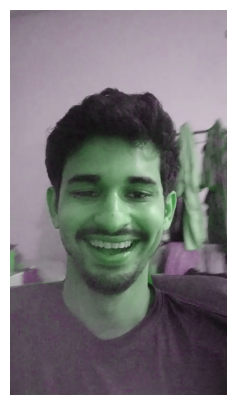

In [13]:
test=img_2
test[:,:,0]=img_2[:,:,1]
test[:,:,1]=img_2[:,:,2]
test[:,:,2]=img_2[:,:,0]

img_2=test
plt.figure(figsize=(5,5))
plt.imshow(img_2)
plt.axis(False)

In [14]:
sample_img=happy[60]

In [15]:
happy.shape

torch.Size([156, 852, 480, 3])

In [16]:
new=sample_img/255

In [17]:
new.shape

torch.Size([852, 480, 3])

In [18]:
new_2=new.permute(2,0,1)

In [19]:
new_2.shape

torch.Size([3, 852, 480])

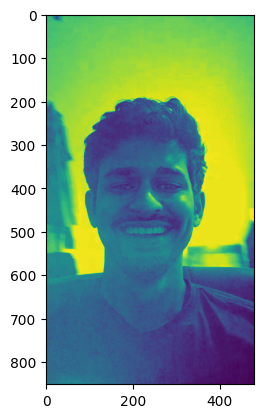

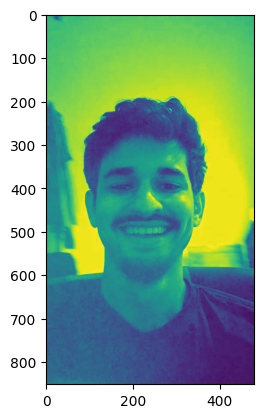

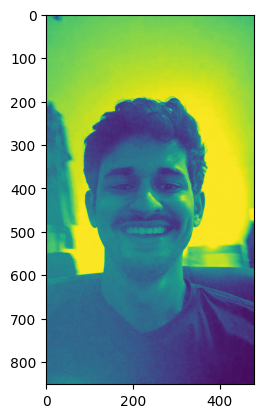

In [20]:
plt.imshow(new_2[0])
plt.show()
plt.imshow(new_2[2])
plt.show()
plt.imshow(new_2[1])
plt.show()

In [21]:
#data_whole_set_process

happy.shape,sad.shape
#transform to 0-1
happy_tr,sad_tr=happy/255 ,sad/255
happy_set=happy_tr.permute(0,3,1,2)
sad_set=sad_tr.permute(0,3,1,2)

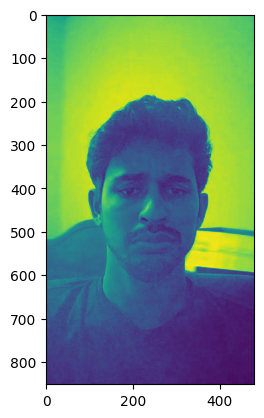

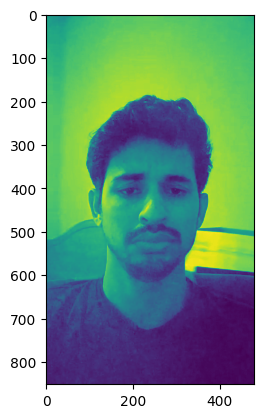

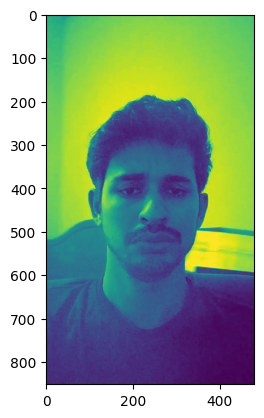

In [22]:
img=sad_set[50]
plt.imshow(img[0])
plt.show()
plt.imshow(img[2])
plt.show()
plt.imshow(img[1])
plt.show()

In [23]:
y=torch.cat((torch.ones(len(happy_set)),torch.zeros(len(sad_set))),dim=0)
x=torch.cat((happy_set,sad_set),dim=0)

tensor(0.)


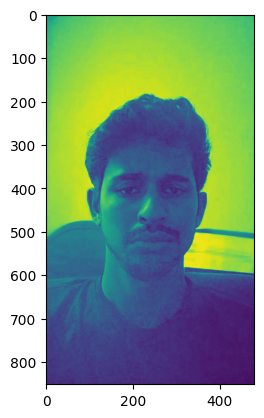

In [24]:
n=204
print(y[n])
plt.imshow(x[n][0])
plt.show()

In [25]:
perm = torch.randperm(len(y))
x,y=x[perm],y[perm]

In [26]:
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature data and 'y' is your target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

tensor(0.)

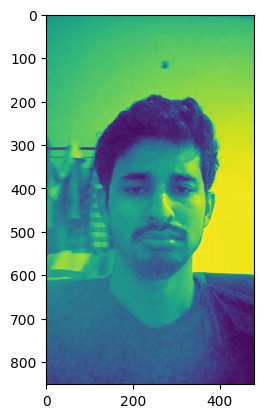

In [27]:
n=4
plt.imshow(x_test[n][2])
y_test[n]

In [28]:
# plot and visualize it

(torch.cat((sad_set,happy_set),dim=0)).shape

torch.Size([349, 3, 852, 480])

In [29]:
#prepared_data_set

torch.utils.data.Dataset -> torch.utils.data.DataLoader

##Image folder

In [30]:
import torchvision.transforms as transforms
data_transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize image to (224, 224)
    transforms.ToTensor(),  # Convert PIL image to tensor
    transforms.RandomHorizontalFlip(0.5) # Normalize image tensor
])

In [34]:
from torchvision import datasets

data=datasets.ImageFolder(root="/content/data/",transform=data_transform, target_transform=None)

In [35]:
data.classes

['happy', 'sad']

In [36]:
int(len(data)*0.8)

279

In [37]:
type(data)

torchvision.datasets.folder.ImageFolder

In [56]:
train_dataset, test_dataset = torch.utils.data.random_split(data, [279, 70])

In [55]:
int(len(data)*0.8),(len(data)-int(len(data)*0.8))

(279, 70)

In [57]:
train_dataset.dataset.classes,test_dataset.dataset.classes

(['happy', 'sad'], ['happy', 'sad'])

In [60]:
len(test_dataset.dataset.targets),len(train_dataset.dataset.targets)

(349, 349)

In [53]:
len(train_dataset.dataset.targets)

349

data loader

In [41]:
batch_size = 16
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [62]:
for batch,(img,label) in enumerate(test_data_loader):
  print(label)

tensor([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0])
tensor([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0])
tensor([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1])
tensor([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1])
tensor([0, 1, 0, 0, 0, 1])


##CREATE OPTIMIZER / LOSS_FUNC

##BUILDING THE MODEL


tips
1. torch.nn.find_suitable_loss
2. torch.nn.Paramenter
3. torch.nn.Module this is base class
4. torch.optim - optimizer

In [ ]:
#model
class Model_name(nn.Module):
  def __init__(self):
    super().__init__()
    #model_structer
   
  def forward(self,x: torch.Tensor) -> torch.Tensor:
    self.conv_block=nn.Conv2d()

    return ##



#discription of model


In [ ]:
#make inference/prediction and visualize the model


In [ ]:
#create loss func

#optimizer



##TRAINING / TESTING LOOP

tips
0. Loop throug the data
1. set to training mode
2. Forward pass
3. Calculate the loss(pred to ground truth)
4. optimizer zer grad
5. loss backward .. back propogation
6. optimizer step - use opt and adjust parameter ... grad desent


In [ ]:
#initiate trackers and hyper parameters

epochs=10
model="model_name"
 
for epoch in tqdm(range(epochs)):
  print(f"Epoch {epoch}")
  #train(train_dataloader,model,loss_func,optimizer,accu,device)
  #test(test_dataloader,model,loss_func,accu,device)



##EVALUATION OF THE MODEL

In [ ]:
#plot / matrices



##SAVING/LOADING

tips
1.  torch.save() 
2.  torch.load()
3.  toch.nn.Module.load_state_dict()